# Malha Computacial

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.collections
from matplotlib import tri

## Avaliação x, y e IEN

### Coordenadas x,y

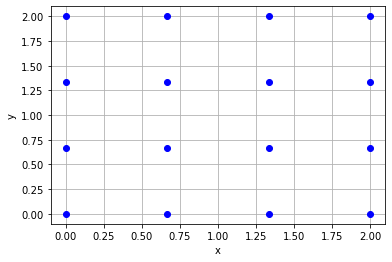

In [2]:
# Coordenadas colocadas manualmente
x = [0.0, 2/3, 4/3, 2, 0.0, 2/3, 4/3, 2, 0.0, 2/3, 4/3, 2, 0.0, 2/3, 4/3, 2,]
y = [0.0, 0.0, 0.0, 0.0, 2/3, 2/3, 2/3, 2/3, 4/3, 4/3, 4/3, 4/3, 2, 2, 2, 2,]

plt.plot(x,y,'bo')
plt.xlabel('x'); plt.ylabel('y')
plt.grid()
plt.show()

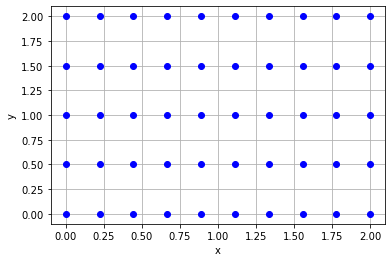

In [3]:
# Coordenadas usando linspace
Nx = 10;
Ny = 5;
x = np.linspace(0,2,Nx)
y = np.linspace(0,2,Ny)

xx, yy = np.meshgrid(x, y)

plt.plot(xx,yy,'bo')
plt.xlabel('x'); plt.ylabel('y')
plt.grid()
plt.show()

### IEN Quadrada

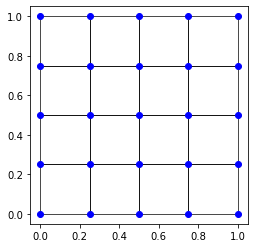

In [4]:
x = np.zeros( (16),dtype='float' )
y = np.zeros( (16),dtype='float' )
IEN = np.zeros( (9,4),dtype='int' )

x = np.array([0.0, 2/3, 4/3, 2, 0.0, 2/3, 4/3, 2, 0.0, 2/3, 4/3, 2, 0.0, 2/3, 4/3, 2,])
y = np.array([0.0, 0.0, 0.0, 0.0, 2/3, 2/3, 2/3, 2/3, 4/3, 4/3, 4/3, 4/3, 2, 2, 2, 2,])

IEN[0] = [0,1,5,4]
IEN[1] = [1,2,6,5]
IEN[2] = [2,3,7,6]
IEN[3] = [4,5,9,8]
IEN[4] = [5,6,10,9]
IEN[5] = [6,7,11,10]
IEN[6] = [8,9,13,12]
IEN[7] = [9,10,14,13]
IEN[8] = [10,11,15,14]

# Dados da malha
Lx = 1.0                                                # comprimento da malha em x
Ly = 1.0                                                # comprimento da malha em y
nx = 5                                                 # número de pontos em x
ny = 5                                               # número de pontos em y
n = 1                                                   # ordem do espaçamento em x
m = 1                                                   # ordem do espaçamento em x
npoints = nx*ny                                         # número total de pontos da malha
ne = (nx-1)*(ny-1)                                      # número total de espaços quadrados

xv = np.linspace(0,Lx,nx)
yv = np.linspace(0,Ly,ny)

[X,Y] = np.meshgrid(xv,yv)
X = np.reshape(X,npoints)
Y = np.reshape(Y,npoints)

IEN = np.zeros( (ne,4),dtype='int' )
for i in range(0,ne):
    j = i//(nx-1)
    IEN[i] = [i+j,i+1+j,i+(nx+1)+j,i+(nx)+j]

# plot malha de quadriláteros
xy = np.stack((X, Y), axis=-1)
verts = xy[IEN]
ax=plt.gca()
pc = matplotlib.collections.PolyCollection(verts,edgecolors=('black',),
                                                 facecolors= 'None',
                                                 linewidths=(0.7,))
ax.add_collection(pc)
plt.plot(X,Y,"bo")
plt.gca().set_aspect('equal')

### IEN Triângular

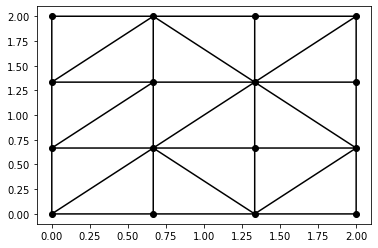

In [5]:
x = np.zeros( (16),dtype='float' )
y = np.zeros( (16),dtype='float' )
IEN = np.zeros( (18,3),dtype='int' )

x = np.array([0.0, 2/3, 4/3, 2, 0.0, 2/3, 4/3, 2, 0.0, 2/3, 4/3, 2, 0.0, 2/3, 4/3, 2,])
y = np.array([0.0, 0.0, 0.0, 0.0, 2/3, 2/3, 2/3, 2/3, 4/3, 4/3, 4/3, 4/3, 2, 2, 2, 2,])

IEN[0] = [5,10,9]
IEN[1] = [5,6,10]
IEN[2] = [6,7,10]
IEN[3] = [7,11,10]
IEN[4] = [2,6,5]
IEN[5] = [1,2,5]
IEN[6] = [0,1,5]
IEN[7] = [0,5,4]
IEN[8] = [2,7,6]
IEN[9] = [2,3,7]
IEN[10] = [4,9,8]
IEN[11] = [4,5,9]
IEN[12] = [8,13,12]
IEN[13] = [8,9,13]
IEN[14] = [9,10,13]
IEN[15] = [10,14,13]
IEN[16] = [10,15,14]
IEN[17] = [10,11,15]

plt.triplot(x,y,IEN,'ko-')
plt.show()

## Automatização x, y e IEN (Triângular)

__Opção otimizada__

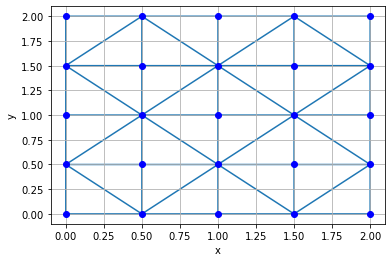

In [6]:
# Coordenadas usando linspace
Nx = 5;
Ny = 5;
x = np.linspace(0,2,Nx)
y = np.linspace(0,2,Ny)

X,Y = np.meshgrid(x, y)
X = X.flatten() # transforma para vetor
Y = Y.flatten()

triang = tri.Triangulation(X,Y)
IEN = triang.triangles

plt.plot(X,Y,'bo')
plt.triplot(X,Y,IEN)
plt.xlabel('x'); plt.ylabel('y')
plt.grid()
plt.show()

__Opção customizada__

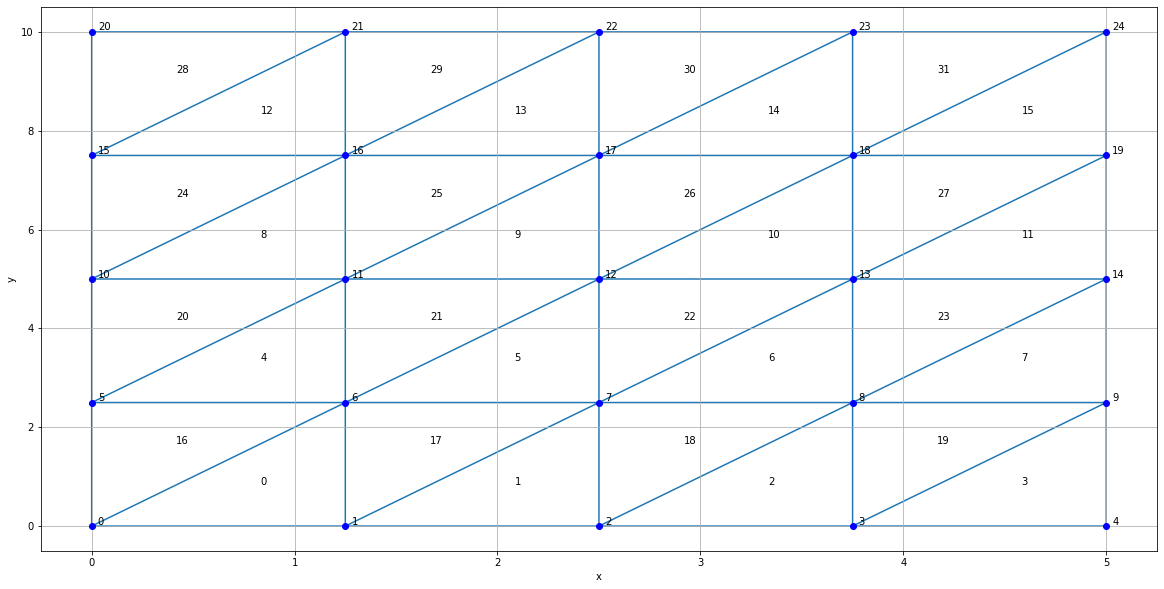

In [7]:
# parametros do problema
Lx = 5.0
Ly = 10.0
nx = 5
ny = 5

npoints = nx*ny
dx = Lx/(nx-1)
dy = Ly/(ny-1)
nq = (nx-1)*(ny-1)
nt = 2*nq  

X = np.zeros( (npoints),dtype='float' )
Y = np.zeros( (npoints),dtype='float' )
IEN = np.zeros( (ne,4),dtype='int' )

for i in range(0,ny):
    for j in range(0,nx):
        X[i+j*ny] = i*dx
        Y[j+i*nx] = i*dy

# matrix de conectividade
IENinf = np.zeros( ((nt),3),dtype='int' )
for i in range(0,nt):
        j = i//(nx-1)
        IENinf[i] = [i+j, i+1+j, i+(nx+1)+j]
IENinf = IENinf[0:(nq)]

IENsup = np.zeros( (nt,3),dtype='int' )
for i in range(0,(nt)):
        j = i//(nx-1)
        IENsup[i] = [i+j, i+(nx+1)+j, i+(nx)+j]

IENsup = IENsup[0:(nq)]
IEN = np.vstack((IENinf, IENsup))

plt.figure(figsize=(20, 10))
plt.plot(X,Y,'bo')
plt.triplot(X,Y,IEN)
plt.xlabel('x'); plt.ylabel('y')
plt.grid()

for i in range(0,npoints):
 plt.text(X[i]+0.03,Y[i]+0.03,str(i))

# loop em todos os elementos
for e in range(0,IEN.shape[0]):
 v1,v2,v3 = IEN[e]
 # calculo do centro de massa, ou centro geometrico
 Xm = (X[v1]+X[v2]+X[v3])/3.0
 Ym = (Y[v1]+Y[v2]+Y[v3])/3.0
 plt.text(Xm,Ym,str(e))

ax.set_aspect('equal')
plt.show()

## Automatização x, y e IEN (Quadrada)

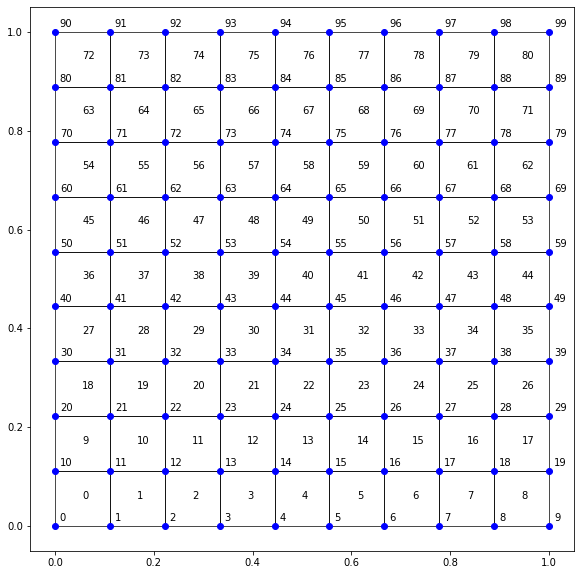

In [8]:
# Dados da malha
Lx = 1.0                                             
Ly = 1.0                                             
nx = 10                                               
ny = 10                                               
npoints = nx*ny                                      
nq = (nx-1)*(ny-1)                                   

xv = np.linspace(0,Lx,nx)
yv = np.linspace(0,Ly,ny)

[X,Y] = np.meshgrid(xv,yv)
X = np.reshape(X,npoints)
Y = np.reshape(Y,npoints)

IEN = np.zeros( (nq,4),dtype='int' )
for i in range(0,nq):
    j = i//(nx-1)
    IEN[i] = [i+j,i+1+j,i+(nx+1)+j,i+(nx)+j]

# plot malha de quadriláteros
xy = np.stack((X, Y), axis=-1)
verts = xy[IEN]
plt.figure(figsize=(20, 10))
ax=plt.gca()
pc = matplotlib.collections.PolyCollection(verts,edgecolors=('black',),
                                                 facecolors= 'None',
                                                 linewidths=(0.7,))
ax.add_collection(pc)
plt.plot(X,Y,"bo")

for i in range(0,npoints):
    plt.text(X[i]+0.01,Y[i]+0.01,str(i))

# loop em todos os elementos
for e in range(0,IEN.shape[0]):
    v1,v2,v3,v4 = IEN[e]
    # calculo do centro de massa, ou centro geometrico
    Xm = (X[v1]+X[v2])/2.0
    Ym = (Y[v1]+Y[v3])/2.0
    plt.text(Xm,Ym,str(e))

ax.set_aspect('equal')
plt.show()